Data Loading

In [1]:
from pyspark.sql.window import Window
from pyspark.sql.types import * 
from pyspark.sql.functions import * 
from pyspark.sql import *
import pyspark

In [2]:
spark = SparkSession.builder.appName("Test").getOrCreate()
df =spark.read.format("csv").option("inferSchema",True).option("header",True).load("full detials.csv")

In [3]:
df.createOrReplaceTempView("df")
spark.sql("Select * from df")

DataFrame[Platform: string, Status: string, watched_date_time: timestamp, Video Link: string, Video Name: string, Channel Name: string, Channel Link: string, Rating: string, Duration: string, Length: string, Thumbnail: string, Likes: string, Views: bigint]

In [4]:
 df.createOrReplaceTempView("df")
spark.sql("SELECT Duration FROM df limit 10").show()

+--------+
|Duration|
+--------+
|PT45M48S|
| PT3M20S|
|   PT21S|
|   PT22S|
|   PT31S|
|PT45M48S|
| PT6M58S|
|   PT31S|
|   PT51S|
|   PT39S|
+--------+



In [5]:
df1 = spark.read.csv("youtube_subscriptions_details.csv", header=True, inferSchema=True)
df1.show(5)

+--------------------+-------------------+-----------+-----------+--------------------+--------+
|          Channel_Id|               Name|Subscribers|Total_views|              Joined|Category|
+--------------------+-------------------+-----------+-----------+--------------------+--------+
|UC-O3_F-UpwzKvSkv...|           HR_Navin|     121000|   13367759| 2016-05-04 22:27:01|     N/A|
|UC0gHrWWtRgkQ3ZS1...|      RK Games Bond|     137000|   16996857|2021-09-19 10:15:...|     N/A|
|UC14aFPpH4jF3FfRQ...|    Words of Wisdom|    1080000|  103238584|2020-04-14 11:49:...|     N/A|
|UC2J_VKrAzOEJuQvF...|Chennai Super Kings|    3830000|  786669886| 2009-04-17 18:30:30|     N/A|
|UC2MHTOXktfTK26aD...|    Windies Cricket|    3950000| 1264468902| 2017-10-20 06:19:37|     N/A|
+--------------------+-------------------+-----------+-----------+--------------------+--------+
only showing top 5 rows



Table 1

DATA TRANSMISSION

In [6]:
df1 = df1.drop("Category")
df1.show(5)

+--------------------+-------------------+-----------+-----------+--------------------+
|          Channel_Id|               Name|Subscribers|Total_views|              Joined|
+--------------------+-------------------+-----------+-----------+--------------------+
|UC-O3_F-UpwzKvSkv...|           HR_Navin|     121000|   13367759| 2016-05-04 22:27:01|
|UC0gHrWWtRgkQ3ZS1...|      RK Games Bond|     137000|   16996857|2021-09-19 10:15:...|
|UC14aFPpH4jF3FfRQ...|    Words of Wisdom|    1080000|  103238584|2020-04-14 11:49:...|
|UC2J_VKrAzOEJuQvF...|Chennai Super Kings|    3830000|  786669886| 2009-04-17 18:30:30|
|UC2MHTOXktfTK26aD...|    Windies Cricket|    3950000| 1264468902| 2017-10-20 06:19:37|
+--------------------+-------------------+-----------+-----------+--------------------+
only showing top 5 rows



In [7]:
df1 = df1.withColumn("joined_date", date_format(col("Joined"), "yyyy-MM-dd"))\
        .withColumn("joined_time", date_format(col("joined"),"HH:mm:ss"))
df1.show(5)

+--------------------+-------------------+-----------+-----------+--------------------+-----------+-----------+
|          Channel_Id|               Name|Subscribers|Total_views|              Joined|joined_date|joined_time|
+--------------------+-------------------+-----------+-----------+--------------------+-----------+-----------+
|UC-O3_F-UpwzKvSkv...|           HR_Navin|     121000|   13367759| 2016-05-04 22:27:01| 2016-05-04|   22:27:01|
|UC0gHrWWtRgkQ3ZS1...|      RK Games Bond|     137000|   16996857|2021-09-19 10:15:...| 2021-09-19|   10:15:52|
|UC14aFPpH4jF3FfRQ...|    Words of Wisdom|    1080000|  103238584|2020-04-14 11:49:...| 2020-04-14|   11:49:22|
|UC2J_VKrAzOEJuQvF...|Chennai Super Kings|    3830000|  786669886| 2009-04-17 18:30:30| 2009-04-17|   18:30:30|
|UC2MHTOXktfTK26aD...|    Windies Cricket|    3950000| 1264468902| 2017-10-20 06:19:37| 2017-10-20|   06:19:37|
+--------------------+-------------------+-----------+-----------+--------------------+-----------+-----

In [8]:
df1 =df1.drop("Joined")
df1.show(5)

+--------------------+-------------------+-----------+-----------+-----------+-----------+
|          Channel_Id|               Name|Subscribers|Total_views|joined_date|joined_time|
+--------------------+-------------------+-----------+-----------+-----------+-----------+
|UC-O3_F-UpwzKvSkv...|           HR_Navin|     121000|   13367759| 2016-05-04|   22:27:01|
|UC0gHrWWtRgkQ3ZS1...|      RK Games Bond|     137000|   16996857| 2021-09-19|   10:15:52|
|UC14aFPpH4jF3FfRQ...|    Words of Wisdom|    1080000|  103238584| 2020-04-14|   11:49:22|
|UC2J_VKrAzOEJuQvF...|Chennai Super Kings|    3830000|  786669886| 2009-04-17|   18:30:30|
|UC2MHTOXktfTK26aD...|    Windies Cricket|    3950000| 1264468902| 2017-10-20|   06:19:37|
+--------------------+-------------------+-----------+-----------+-----------+-----------+
only showing top 5 rows



table 2

In [9]:
df = df.drop("Length","Rating")
df.show(5)

+--------+-------+--------------------+--------------------+--------------------+------------------+--------------------+--------+--------------------+-----+-------+
|Platform| Status|   watched_date_time|          Video Link|          Video Name|      Channel Name|        Channel Link|Duration|           Thumbnail|Likes|  Views|
+--------+-------+--------------------+--------------------+--------------------+------------------+--------------------+--------+--------------------+-----+-------+
| YouTube|Watched|2024-08-07 10:47:...|https://www.youtu...|Python Tutorial: ...|     Corey Schafer|https://www.youtu...|PT45M48S|https://i.ytimg.c...|23993|1121319|
| YouTube|Watched|2024-08-07 10:46:...|https://www.youtu...|How to download y...|Kjell-Olov Högdahl|https://www.youtu...| PT3M20S|https://i.ytimg.c...|   43|   3232|
| YouTube|Watched|2024-08-06 22:56:...|https://www.youtu...|#MotorolaEdge50: ...|    Motorola India|https://www.youtu...|   PT21S|https://i.ytimg.c...|    1| 553708|
| Yo

In [10]:
df =df.drop("Thumbnail","Platform","Status")
df.show(5)

+--------------------+--------------------+--------------------+------------------+--------------------+--------+-----+-------+
|   watched_date_time|          Video Link|          Video Name|      Channel Name|        Channel Link|Duration|Likes|  Views|
+--------------------+--------------------+--------------------+------------------+--------------------+--------+-----+-------+
|2024-08-07 10:47:...|https://www.youtu...|Python Tutorial: ...|     Corey Schafer|https://www.youtu...|PT45M48S|23993|1121319|
|2024-08-07 10:46:...|https://www.youtu...|How to download y...|Kjell-Olov Högdahl|https://www.youtu...| PT3M20S|   43|   3232|
|2024-08-06 22:56:...|https://www.youtu...|#MotorolaEdge50: ...|    Motorola India|https://www.youtu...|   PT21S|    1| 553708|
|2024-08-06 22:51:...|https://www.youtu...|Full Refund word ...|    codebasics_hub|https://www.youtu...|   PT22S|    0|    626|
|2024-08-06 22:51:...|https://www.youtu...|Get Started on Go...|      Google Cloud|https://www.youtu...|

In [11]:
df= df.withColumn("watch_time",regexp_replace(regexp_replace(regexp_replace\
                            (regexp_replace(col("Duration"),"PT",""), "H",":"),"M",":"),"S",""))
df.show(5)

+--------------------+--------------------+--------------------+------------------+--------------------+--------+-----+-------+----------+
|   watched_date_time|          Video Link|          Video Name|      Channel Name|        Channel Link|Duration|Likes|  Views|watch_time|
+--------------------+--------------------+--------------------+------------------+--------------------+--------+-----+-------+----------+
|2024-08-07 10:47:...|https://www.youtu...|Python Tutorial: ...|     Corey Schafer|https://www.youtu...|PT45M48S|23993|1121319|     45:48|
|2024-08-07 10:46:...|https://www.youtu...|How to download y...|Kjell-Olov Högdahl|https://www.youtu...| PT3M20S|   43|   3232|      3:20|
|2024-08-06 22:56:...|https://www.youtu...|#MotorolaEdge50: ...|    Motorola India|https://www.youtu...|   PT21S|    1| 553708|        21|
|2024-08-06 22:51:...|https://www.youtu...|Full Refund word ...|    codebasics_hub|https://www.youtu...|   PT22S|    0|    626|        22|
|2024-08-06 22:51:...|https

In [12]:
df =df.drop("Duration","wateched_time")
df.show(5)

+--------------------+--------------------+--------------------+------------------+--------------------+-----+-------+----------+
|   watched_date_time|          Video Link|          Video Name|      Channel Name|        Channel Link|Likes|  Views|watch_time|
+--------------------+--------------------+--------------------+------------------+--------------------+-----+-------+----------+
|2024-08-07 10:47:...|https://www.youtu...|Python Tutorial: ...|     Corey Schafer|https://www.youtu...|23993|1121319|     45:48|
|2024-08-07 10:46:...|https://www.youtu...|How to download y...|Kjell-Olov Högdahl|https://www.youtu...|   43|   3232|      3:20|
|2024-08-06 22:56:...|https://www.youtu...|#MotorolaEdge50: ...|    Motorola India|https://www.youtu...|    1| 553708|        21|
|2024-08-06 22:51:...|https://www.youtu...|Full Refund word ...|    codebasics_hub|https://www.youtu...|    0|    626|        22|
|2024-08-06 22:51:...|https://www.youtu...|Get Started on Go...|      Google Cloud|https:/

In [13]:
df = df.withColumn("watch_time",split(col("watch_time"),":"))
df.show(5)

+--------------------+--------------------+--------------------+------------------+--------------------+-----+-------+----------+
|   watched_date_time|          Video Link|          Video Name|      Channel Name|        Channel Link|Likes|  Views|watch_time|
+--------------------+--------------------+--------------------+------------------+--------------------+-----+-------+----------+
|2024-08-07 10:47:...|https://www.youtu...|Python Tutorial: ...|     Corey Schafer|https://www.youtu...|23993|1121319|  [45, 48]|
|2024-08-07 10:46:...|https://www.youtu...|How to download y...|Kjell-Olov Högdahl|https://www.youtu...|   43|   3232|   [3, 20]|
|2024-08-06 22:56:...|https://www.youtu...|#MotorolaEdge50: ...|    Motorola India|https://www.youtu...|    1| 553708|      [21]|
|2024-08-06 22:51:...|https://www.youtu...|Full Refund word ...|    codebasics_hub|https://www.youtu...|    0|    626|      [22]|
|2024-08-06 22:51:...|https://www.youtu...|Get Started on Go...|      Google Cloud|https:/

In [14]:
df = df.withColumn("video_type",when(size(col("watch_time"))==1,1)\
              .when(size(col("watch_time"))==2,col("watch_time")[0])\
              .otherwise(col("watch_time")[0]*60 + col("watch_time")[1]))
df.show(5)


+--------------------+--------------------+--------------------+------------------+--------------------+-----+-------+----------+----------+
|   watched_date_time|          Video Link|          Video Name|      Channel Name|        Channel Link|Likes|  Views|watch_time|video_type|
+--------------------+--------------------+--------------------+------------------+--------------------+-----+-------+----------+----------+
|2024-08-07 10:47:...|https://www.youtu...|Python Tutorial: ...|     Corey Schafer|https://www.youtu...|23993|1121319|  [45, 48]|        45|
|2024-08-07 10:46:...|https://www.youtu...|How to download y...|Kjell-Olov Högdahl|https://www.youtu...|   43|   3232|   [3, 20]|         3|
|2024-08-06 22:56:...|https://www.youtu...|#MotorolaEdge50: ...|    Motorola India|https://www.youtu...|    1| 553708|      [21]|         1|
|2024-08-06 22:51:...|https://www.youtu...|Full Refund word ...|    codebasics_hub|https://www.youtu...|    0|    626|      [22]|         1|
|2024-08-06 2

In [15]:
df= df.withColumnRenamed("video_type","watched_time")
df.show(5)

+--------------------+--------------------+--------------------+------------------+--------------------+-----+-------+----------+------------+
|   watched_date_time|          Video Link|          Video Name|      Channel Name|        Channel Link|Likes|  Views|watch_time|watched_time|
+--------------------+--------------------+--------------------+------------------+--------------------+-----+-------+----------+------------+
|2024-08-07 10:47:...|https://www.youtu...|Python Tutorial: ...|     Corey Schafer|https://www.youtu...|23993|1121319|  [45, 48]|          45|
|2024-08-07 10:46:...|https://www.youtu...|How to download y...|Kjell-Olov Högdahl|https://www.youtu...|   43|   3232|   [3, 20]|           3|
|2024-08-06 22:56:...|https://www.youtu...|#MotorolaEdge50: ...|    Motorola India|https://www.youtu...|    1| 553708|      [21]|           1|
|2024-08-06 22:51:...|https://www.youtu...|Full Refund word ...|    codebasics_hub|https://www.youtu...|    0|    626|      [22]|           1|

In [16]:
df =df.drop("Video Link","watch_time")
df.show(5)

+--------------------+--------------------+------------------+--------------------+-----+-------+------------+
|   watched_date_time|          Video Name|      Channel Name|        Channel Link|Likes|  Views|watched_time|
+--------------------+--------------------+------------------+--------------------+-----+-------+------------+
|2024-08-07 10:47:...|Python Tutorial: ...|     Corey Schafer|https://www.youtu...|23993|1121319|          45|
|2024-08-07 10:46:...|How to download y...|Kjell-Olov Högdahl|https://www.youtu...|   43|   3232|           3|
|2024-08-06 22:56:...|#MotorolaEdge50: ...|    Motorola India|https://www.youtu...|    1| 553708|           1|
|2024-08-06 22:51:...|Full Refund word ...|    codebasics_hub|https://www.youtu...|    0|    626|           1|
|2024-08-06 22:51:...|Get Started on Go...|      Google Cloud|https://www.youtu...| 5675| 467180|           1|
+--------------------+--------------------+------------------+--------------------+-----+-------+------------+
o

In [17]:
df =df.withColumn("Video_Type",when(col("watched_time")==1,"Short").otherwise("Long"))
df.show(5)

+--------------------+--------------------+------------------+--------------------+-----+-------+------------+----------+
|   watched_date_time|          Video Name|      Channel Name|        Channel Link|Likes|  Views|watched_time|Video_Type|
+--------------------+--------------------+------------------+--------------------+-----+-------+------------+----------+
|2024-08-07 10:47:...|Python Tutorial: ...|     Corey Schafer|https://www.youtu...|23993|1121319|          45|      Long|
|2024-08-07 10:46:...|How to download y...|Kjell-Olov Högdahl|https://www.youtu...|   43|   3232|           3|      Long|
|2024-08-06 22:56:...|#MotorolaEdge50: ...|    Motorola India|https://www.youtu...|    1| 553708|           1|     Short|
|2024-08-06 22:51:...|Full Refund word ...|    codebasics_hub|https://www.youtu...|    0|    626|           1|     Short|
|2024-08-06 22:51:...|Get Started on Go...|      Google Cloud|https://www.youtu...| 5675| 467180|           1|     Short|
+--------------------+--

In [18]:
df =df.withColumn("watch_date",date_format(col("watched_date_time"),"yyyy-MM-dd"))
df =df.withColumn("watch_time",date_format(col("watched_date_time"),"HH:MM:SS"))
df.show(5)

+--------------------+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+
|   watched_date_time|          Video Name|      Channel Name|        Channel Link|Likes|  Views|watched_time|Video_Type|watch_date|watch_time|
+--------------------+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+
|2024-08-07 10:47:...|Python Tutorial: ...|     Corey Schafer|https://www.youtu...|23993|1121319|          45|      Long|2024-08-07|  10:08:12|
|2024-08-07 10:46:...|How to download y...|Kjell-Olov Högdahl|https://www.youtu...|   43|   3232|           3|      Long|2024-08-07|  10:08:27|
|2024-08-06 22:56:...|#MotorolaEdge50: ...|    Motorola India|https://www.youtu...|    1| 553708|           1|     Short|2024-08-06|  22:08:66|
|2024-08-06 22:51:...|Full Refund word ...|    codebasics_hub|https://www.youtu...|    0|    626|           1|     Short|2024-08-06|  22

In [19]:
df =df.drop("watched_date_time")
df.show(5)

+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+
|          Video Name|      Channel Name|        Channel Link|Likes|  Views|watched_time|Video_Type|watch_date|watch_time|
+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+
|Python Tutorial: ...|     Corey Schafer|https://www.youtu...|23993|1121319|          45|      Long|2024-08-07|  10:08:12|
|How to download y...|Kjell-Olov Högdahl|https://www.youtu...|   43|   3232|           3|      Long|2024-08-07|  10:08:27|
|#MotorolaEdge50: ...|    Motorola India|https://www.youtu...|    1| 553708|           1|     Short|2024-08-06|  22:08:66|
|Full Refund word ...|    codebasics_hub|https://www.youtu...|    0|    626|           1|     Short|2024-08-06|  22:08:31|
|Get Started on Go...|      Google Cloud|https://www.youtu...| 5675| 467180|           1|     Short|2024-08-06|  22:08:12|
+---------------

In [20]:
df.select("Channel Link").show(5, truncate = False)

+--------------------------------------------------------+
|Channel Link                                            |
+--------------------------------------------------------+
|https://www.youtube.com/channel/UCCezIgC97PvUuR4_gbFUs5g|
|https://www.youtube.com/channel/UCpuIcds3-wG3eKqygdDvELQ|
|https://www.youtube.com/channel/UCo2M-E3Xd9oIQoznNfCDGcA|
|https://www.youtube.com/channel/UCc5Mfxuhmvr44QcSbo3_SUA|
|https://www.youtube.com/channel/UCTMRxtyHoE3LPcrl-kT4AQQ|
+--------------------------------------------------------+
only showing top 5 rows



In [21]:
df = df.withColumn("Channel Link",regexp_replace(col("Channel Link"),"https://www.youtube.com/channel/",""))
df.show(5)

+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+
|          Video Name|      Channel Name|        Channel Link|Likes|  Views|watched_time|Video_Type|watch_date|watch_time|
+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+
|Python Tutorial: ...|     Corey Schafer|UCCezIgC97PvUuR4_...|23993|1121319|          45|      Long|2024-08-07|  10:08:12|
|How to download y...|Kjell-Olov Högdahl|UCpuIcds3-wG3eKqy...|   43|   3232|           3|      Long|2024-08-07|  10:08:27|
|#MotorolaEdge50: ...|    Motorola India|UCo2M-E3Xd9oIQozn...|    1| 553708|           1|     Short|2024-08-06|  22:08:66|
|Full Refund word ...|    codebasics_hub|UCc5Mfxuhmvr44QcS...|    0|    626|           1|     Short|2024-08-06|  22:08:31|
|Get Started on Go...|      Google Cloud|UCTMRxtyHoE3LPcrl...| 5675| 467180|           1|     Short|2024-08-06|  22:08:12|
+---------------

join table 1 and table 2

In [22]:
DF =df.join(df1,df["Channel Link"]==df1["Channel_Id"],"left")
DF.show(5)

+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+----------+----+-----------+-----------+-----------+-----------+
|          Video Name|      Channel Name|        Channel Link|Likes|  Views|watched_time|Video_Type|watch_date|watch_time|Channel_Id|Name|Subscribers|Total_views|joined_date|joined_time|
+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+----------+----+-----------+-----------+-----------+-----------+
|Python Tutorial: ...|     Corey Schafer|UCCezIgC97PvUuR4_...|23993|1121319|          45|      Long|2024-08-07|  10:08:12|      NULL|NULL|       NULL|       NULL|       NULL|       NULL|
|How to download y...|Kjell-Olov Högdahl|UCpuIcds3-wG3eKqy...|   43|   3232|           3|      Long|2024-08-07|  10:08:27|      NULL|NULL|       NULL|       NULL|       NULL|       NULL|
|#MotorolaEdge50: ...|    Motorola India|UCo2M-E3Xd9oIQozn...|   

In [23]:
DF1 =df.join(df1,df["Channel Link"]==df1["Channel_Id"],"inner")
DF1.show(5)

+--------------------+-------------+--------------------+-----+-------+------------+----------+----------+----------+--------------------+-------------+-----------+-----------+-----------+-----------+
|          Video Name| Channel Name|        Channel Link|Likes|  Views|watched_time|Video_Type|watch_date|watch_time|          Channel_Id|         Name|Subscribers|Total_views|joined_date|joined_time|
+--------------------+-------------+--------------------+-----+-------+------------+----------+----------+----------+--------------------+-------------+-----------+-----------+-----------+-----------+
|2 Hour Masterclas...|      Chandoo|UC8uU_wruBMHeeRma...| 1396|  36048|       114.0|      Long|2024-08-06|  17:08:92|UC8uU_wruBMHeeRma...|      Chandoo|     636000|   49715231| 2009-05-02|   12:14:42|
|How to set up and...|      Chandoo|UC8uU_wruBMHeeRma...|  670|  19549|          12|      Long|2024-08-06|  16:08:54|UC8uU_wruBMHeeRma...|      Chandoo|     636000|   49715231| 2009-05-02|   12:14

In [24]:
DF=DF.withColumn("Status",when(col("Subscribers").isNull(),"Not Subscribed").otherwise("Subscribed"))
DF.show(5)

+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+----------+----+-----------+-----------+-----------+-----------+--------------+
|          Video Name|      Channel Name|        Channel Link|Likes|  Views|watched_time|Video_Type|watch_date|watch_time|Channel_Id|Name|Subscribers|Total_views|joined_date|joined_time|        Status|
+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+----------+----+-----------+-----------+-----------+-----------+--------------+
|Python Tutorial: ...|     Corey Schafer|UCCezIgC97PvUuR4_...|23993|1121319|          45|      Long|2024-08-07|  10:08:12|      NULL|NULL|       NULL|       NULL|       NULL|       NULL|Not Subscribed|
|How to download y...|Kjell-Olov Högdahl|UCpuIcds3-wG3eKqy...|   43|   3232|           3|      Long|2024-08-07|  10:08:27|      NULL|NULL|       NULL|       NULL|       NULL|       NULL|Not Su

In [25]:
#pandas_df.to_csv(r"D:\java\output.csv", index=False)

In [26]:
#pandas_df = DF1.toPandas()
#pandas_df.to_csv('combine.csv', index=False"""

In [27]:
#pandas_df.to_csv(r"D:\java\combine.csv", index=False)


Analysis Part

MOST WATCHED CHANNELS

In [28]:
Most_watch = DF.groupBy("Channel Name").agg(sum("watched_time").alias("Watch Count"))
top_channel =Most_watch.orderBy(desc("Watch Count"))
top_channel.show(10)

+----------------+-----------+
|    Channel Name|Watch Count|
+----------------+-----------+
|freeCodeCamp.org|     4237.0|
|     Simplilearn|     1127.0|
|    Polimer News|     1048.0|
|      codebasics|      979.0|
|       My Lesson|      918.0|
|         Chandoo|      833.0|
| Vj Siddhu Vlogs|      785.0|
|      BARN Media|      711.0|
|     Madan Gowri|      593.0|
|   Corey Schafer|      562.0|
+----------------+-----------+
only showing top 10 rows



MOST WATCHED MONTH


In [29]:
month=DF.withColumn("Month",date_format(col("watch_date"),"yyyy-MM"))
month.show(5)

+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+----------+----+-----------+-----------+-----------+-----------+--------------+-------+
|          Video Name|      Channel Name|        Channel Link|Likes|  Views|watched_time|Video_Type|watch_date|watch_time|Channel_Id|Name|Subscribers|Total_views|joined_date|joined_time|        Status|  Month|
+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+----------+----+-----------+-----------+-----------+-----------+--------------+-------+
|Python Tutorial: ...|     Corey Schafer|UCCezIgC97PvUuR4_...|23993|1121319|          45|      Long|2024-08-07|  10:08:12|      NULL|NULL|       NULL|       NULL|       NULL|       NULL|Not Subscribed|2024-08|
|How to download y...|Kjell-Olov Högdahl|UCpuIcds3-wG3eKqy...|   43|   3232|           3|      Long|2024-08-07|  10:08:27|      NULL|NULL|       NULL|       NUL

In [30]:
month =month.select("Channel Name","watched_time","Video_Type","Month","Status")
month.show(10)


+------------------+------------+----------+-------+--------------+
|      Channel Name|watched_time|Video_Type|  Month|        Status|
+------------------+------------+----------+-------+--------------+
|     Corey Schafer|          45|      Long|2024-08|Not Subscribed|
|Kjell-Olov Högdahl|           3|      Long|2024-08|Not Subscribed|
|    Motorola India|           1|     Short|2024-08|Not Subscribed|
|    codebasics_hub|           1|     Short|2024-08|Not Subscribed|
|      Google Cloud|           1|     Short|2024-08|Not Subscribed|
|     Corey Schafer|          45|      Long|2024-08|Not Subscribed|
|  Alex The Analyst|           6|      Long|2024-08|Not Subscribed|
|             Udemy|           1|     Short|2024-08|Not Subscribed|
|      THENI Sadham|           1|     Short|2024-08|Not Subscribed|
|         Zig Zager|           1|     Short|2024-08|Not Subscribed|
+------------------+------------+----------+-------+--------------+
only showing top 10 rows



In [31]:
#Most watched days
days = DF.withColumn("Day_of_Week", date_format(col("watch_date"), "E"))
days.show(5)

+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+----------+----+-----------+-----------+-----------+-----------+--------------+-----------+
|          Video Name|      Channel Name|        Channel Link|Likes|  Views|watched_time|Video_Type|watch_date|watch_time|Channel_Id|Name|Subscribers|Total_views|joined_date|joined_time|        Status|Day_of_Week|
+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+----------+----+-----------+-----------+-----------+-----------+--------------+-----------+
|Python Tutorial: ...|     Corey Schafer|UCCezIgC97PvUuR4_...|23993|1121319|          45|      Long|2024-08-07|  10:08:12|      NULL|NULL|       NULL|       NULL|       NULL|       NULL|Not Subscribed|        Wed|
|How to download y...|Kjell-Olov Högdahl|UCpuIcds3-wG3eKqy...|   43|   3232|           3|      Long|2024-08-07|  10:08:27|      NULL|NULL|      

In [32]:
month = month.groupBy(col("Month")).agg(sum("watched_time"))
month.show()

+-------+-----------------+
|  Month|sum(watched_time)|
+-------+-----------------+
|2024-08|           2995.0|
|2024-06|           5865.0|
|2024-05|           4078.0|
|2024-07|          14720.0|
+-------+-----------------+



In [65]:
DAYS =days.groupBy("Day_of_Week").agg(sum("watched_time"))
DAYS.show()

+-----------+-----------------+
|Day_of_Week|sum(watched_time)|
+-----------+-----------------+
|        Sun|           4866.0|
|        Mon|           4617.0|
|        Thu|           3362.0|
|        Sat|           2163.0|
|        Wed|           4285.0|
|        Tue|           5927.0|
|        Fri|           2438.0|
+-----------+-----------------+



In [34]:
#filter by month
DF.show(5)

+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+----------+----+-----------+-----------+-----------+-----------+--------------+
|          Video Name|      Channel Name|        Channel Link|Likes|  Views|watched_time|Video_Type|watch_date|watch_time|Channel_Id|Name|Subscribers|Total_views|joined_date|joined_time|        Status|
+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+----------+----+-----------+-----------+-----------+-----------+--------------+
|Python Tutorial: ...|     Corey Schafer|UCCezIgC97PvUuR4_...|23993|1121319|          45|      Long|2024-08-07|  10:08:12|      NULL|NULL|       NULL|       NULL|       NULL|       NULL|Not Subscribed|
|How to download y...|Kjell-Olov Högdahl|UCpuIcds3-wG3eKqy...|   43|   3232|           3|      Long|2024-08-07|  10:08:27|      NULL|NULL|       NULL|       NULL|       NULL|       NULL|Not Su

In [35]:
DF = DF.withColumn("Days",date_format(col("watch_date"),"E"))
DF =DF.withColumn("Month",date_format(col("watch_date"),"yyyy-MM"))
#Most watched days
#days = DF.withColumn("Day_of_Week", date_format(col("watch_date"), "E"))
DF.show(5)

+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+----------+----+-----------+-----------+-----------+-----------+--------------+----+-------+
|          Video Name|      Channel Name|        Channel Link|Likes|  Views|watched_time|Video_Type|watch_date|watch_time|Channel_Id|Name|Subscribers|Total_views|joined_date|joined_time|        Status|Days|  Month|
+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+----------+----+-----------+-----------+-----------+-----------+--------------+----+-------+
|Python Tutorial: ...|     Corey Schafer|UCCezIgC97PvUuR4_...|23993|1121319|          45|      Long|2024-08-07|  10:08:12|      NULL|NULL|       NULL|       NULL|       NULL|       NULL|Not Subscribed| Wed|2024-08|
|How to download y...|Kjell-Olov Högdahl|UCpuIcds3-wG3eKqy...|   43|   3232|           3|      Long|2024-08-07|  10:08:27|      NULL|NULL|  

In [36]:
july_month =DF.filter(col("Month")=="2024-07")

july_month.orderBy(desc("watched_time")).show(5)

+--------------------+-------------+--------------------+-----+-------+------------+----------+----------+----------+--------------------+-----------+-----------+-----------+-----------+-----------+--------------+----+-------+
|          Video Name| Channel Name|        Channel Link|Likes|  Views|watched_time|Video_Type|watch_date|watch_time|          Channel_Id|       Name|Subscribers|Total_views|joined_date|joined_time|        Status|Days|  Month|
+--------------------+-------------+--------------------+-----+-------+------------+----------+----------+----------+--------------------+-----------+-----------+-----------+-----------+-----------+--------------+----+-------+
|Full Data Analysi...|Work The Data|UC24AtIWT-E5RUHrs...|11280| 380840|        99.0|      Long|2024-07-18|  20:07:78|                NULL|       NULL|       NULL|       NULL|       NULL|       NULL|Not Subscribed| Thu|2024-07|
|💰 How to Make Mo...|  Madan Gowri|UCY6KjrDBN_tIRFT_...|30170| 659111|        92.0|      Lon

In [83]:
july =july_month.groupBy("Days").agg(sum("watched_time"))
july.show()


+----+-----------------+
|Days|sum(watched_time)|
+----+-----------------+
| Sun|           2052.0|
| Mon|           3072.0|
| Thu|           1988.0|
| Sat|            406.0|
| Wed|           2560.0|
| Tue|           3852.0|
| Fri|            790.0|
+----+-----------------+



In [38]:
DF =DF.withColumn("HOUR",date_format(col("watch_time"),"HH"))
DF.show(5)

+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+----------+----+-----------+-----------+-----------+-----------+--------------+----+-------+----+
|          Video Name|      Channel Name|        Channel Link|Likes|  Views|watched_time|Video_Type|watch_date|watch_time|Channel_Id|Name|Subscribers|Total_views|joined_date|joined_time|        Status|Days|  Month|HOUR|
+--------------------+------------------+--------------------+-----+-------+------------+----------+----------+----------+----------+----+-----------+-----------+-----------+-----------+--------------+----+-------+----+
|Python Tutorial: ...|     Corey Schafer|UCCezIgC97PvUuR4_...|23993|1121319|          45|      Long|2024-08-07|  10:08:12|      NULL|NULL|       NULL|       NULL|       NULL|       NULL|Not Subscribed| Wed|2024-08|  10|
|How to download y...|Kjell-Olov Högdahl|UCpuIcds3-wG3eKqy...|   43|   3232|           3|      Long|2024-08-07|  10:08:2

In [39]:
hour =DF.groupBy("HOUR").agg(sum(col("watched_time")))
hour.show()

+----+-----------------+
|HOUR|sum(watched_time)|
+----+-----------------+
|  07|            167.0|
|  15|            378.0|
|  11|            937.0|
|  22|            734.0|
|  16|            628.0|
|NULL|           9460.0|
|  18|            545.0|
|  00|            750.0|
|  17|            247.0|
|  09|            754.0|
|  05|             11.0|
|  19|           3980.0|
|  23|            937.0|
|  08|           1554.0|
|  06|             65.0|
|  20|           1381.0|
|  10|            855.0|
|  12|            659.0|
|  13|           1274.0|
|  21|           1639.0|
+----+-----------------+
only showing top 20 rows



In [40]:
avg_watch_time = DF.groupBy("Status","Month").agg(
    sum("watched_time").alias("Avg Watch Time")
)

avg_watch_time.show()

+--------------+-------+--------------+
|        Status|  Month|Avg Watch Time|
+--------------+-------+--------------+
|Not Subscribed|2024-06|        4852.0|
|    Subscribed|2024-07|        5671.0|
|    Subscribed|2024-06|        1013.0|
|Not Subscribed|2024-08|        2264.0|
|Not Subscribed|2024-05|        2827.0|
|    Subscribed|2024-05|        1251.0|
|    Subscribed|2024-08|         731.0|
|Not Subscribed|2024-07|        9049.0|
+--------------+-------+--------------+



In [41]:
Type =DF.groupBy("Video_Type").pivot("Month").agg(sum("watched_time"))
Type.show()

+----------+-------+-------+-------+-------+
|Video_Type|2024-05|2024-06|2024-07|2024-08|
+----------+-------+-------+-------+-------+
|      Long| 2985.0| 5005.0|13925.0| 2762.0|
|     Short| 1093.0|  860.0|  795.0|  233.0|
+----------+-------+-------+-------+-------+



DATA VISUALIZATION

In [42]:
month.show()

+-------+-----------------+
|  Month|sum(watched_time)|
+-------+-----------------+
|2024-08|           2995.0|
|2024-06|           5865.0|
|2024-05|           4078.0|
|2024-07|          14720.0|
+-------+-----------------+



In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
pd_month =month.toPandas()

Text(0.5, 1.0, 'watch time per month')

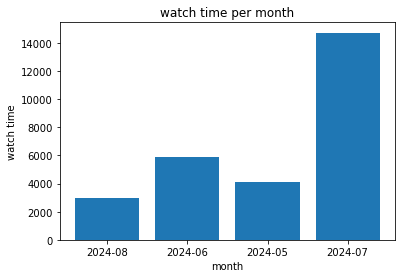

In [45]:
plt.bar(pd_month["Month"], pd_month["sum(watched_time)"])
plt.xlabel("month")
plt.ylabel("watch time")
plt.title("watch time per month")

In [46]:
Type.show()

+----------+-------+-------+-------+-------+
|Video_Type|2024-05|2024-06|2024-07|2024-08|
+----------+-------+-------+-------+-------+
|      Long| 2985.0| 5005.0|13925.0| 2762.0|
|     Short| 1093.0|  860.0|  795.0|  233.0|
+----------+-------+-------+-------+-------+



In [47]:
pd_type =Type.toPandas()

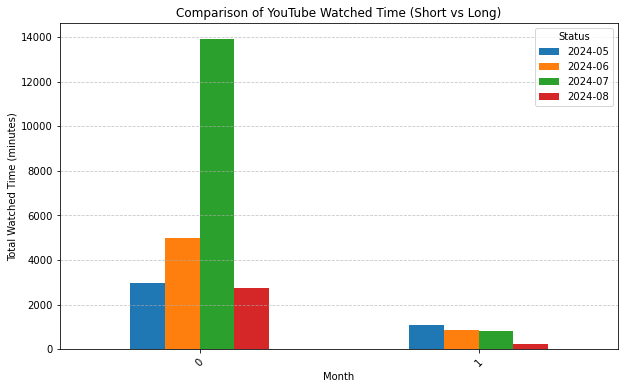

In [95]:
df_pivot = df.pivot(index="Month", columns="Status", values="Avg W")
pd_type.plot(kind="bar", figsize=(10, 6),)

plt.xlabel("Month")
plt.ylabel("Total Watched Time (minutes)")
plt.title("Comparison of YouTube Watched Time (Short vs Long)")
plt.xticks(rotation=45)
plt.legend(title="month")
plt.legend(title="Status")
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()



In [69]:
hour.show()

+----+-----------------+
|HOUR|sum(watched_time)|
+----+-----------------+
|  07|            167.0|
|  15|            378.0|
|  11|            937.0|
|  22|            734.0|
|  16|            628.0|
|NULL|           9460.0|
|  18|            545.0|
|  00|            750.0|
|  17|            247.0|
|  09|            754.0|
|  05|             11.0|
|  19|           3980.0|
|  23|            937.0|
|  08|           1554.0|
|  06|             65.0|
|  20|           1381.0|
|  10|            855.0|
|  12|            659.0|
|  13|           1274.0|
|  21|           1639.0|
+----+-----------------+
only showing top 20 rows



<BarContainer object of 20 artists>

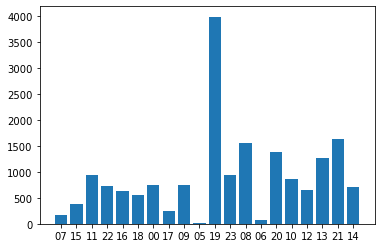

In [80]:
pd_hour =hour.toPandas()

pd_hour = pd_hour.dropna(subset=["HOUR"])
plt.bar(pd_hour["HOUR"],pd_hour["sum(watched_time)"])




In [66]:
DAYS.show()

+-----------+-----------------+
|Day_of_Week|sum(watched_time)|
+-----------+-----------------+
|        Sun|           4866.0|
|        Mon|           4617.0|
|        Thu|           3362.0|
|        Sat|           2163.0|
|        Wed|           4285.0|
|        Tue|           5927.0|
|        Fri|           2438.0|
+-----------+-----------------+



Text(0.5, 1.0, 'OVER ALL WAtCH TIME')

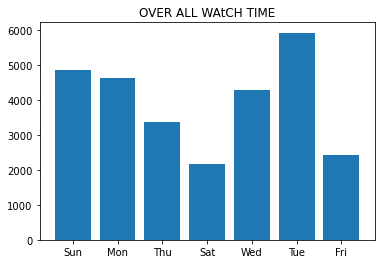

In [82]:
pd_days = DAYS.toPandas()
plt.bar(pd_days["Day_of_Week"],pd_days["sum(watched_time)"])
plt.title("OVER ALL WAtCH TIME")

In [84]:
july.show()

+----+-----------------+
|Days|sum(watched_time)|
+----+-----------------+
| Sun|           2052.0|
| Mon|           3072.0|
| Thu|           1988.0|
| Sat|            406.0|
| Wed|           2560.0|
| Tue|           3852.0|
| Fri|            790.0|
+----+-----------------+



<BarContainer object of 7 artists>

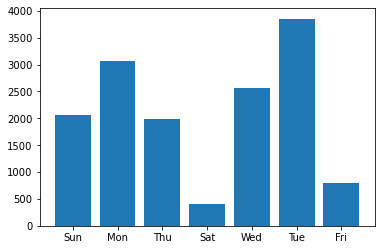

In [87]:
pd_july = july.toPandas()
plt.bar(pd_july["Days"],pd_july["sum(watched_time)"])

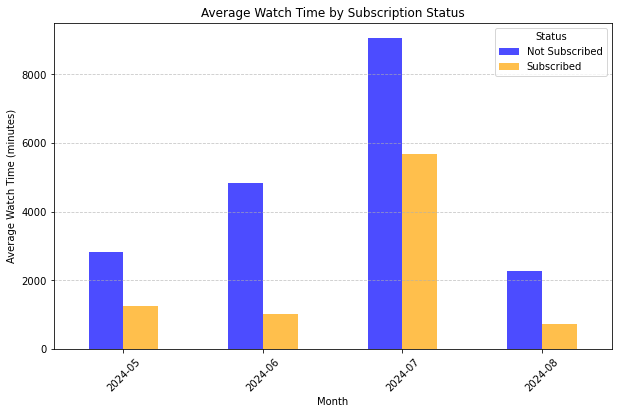

In [93]:

df = avg_watch_time.toPandas()

df_pivot.plot(kind="bar", figsize=(10, 6), color=["blue", "orange"], alpha=0.7)

plt.title("Average Watch Time by Subscription Status")
plt.xlabel("Month")
plt.ylabel("Average Watch Time (minutes)")
plt.xticks(rotation=45)
plt.legend(title="Status")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()
